## Jupyter notebook for plotting Supplementary Fig. 10d

This notebook is the code for plotting histograms of CHi-C changes at  ATAC-seq peak sites binding with transcription factors including CTCF, H3K27ac, NFAT1, NFKB and JunB (Supplementary Fig. 10d) as illustrated in the paper **\"Analysis of chromatin organinization and gene expression in T cells identifies functional genes for rheumatoid arthritis\"** by *Jing Yang, Amanda McGovern, Paul Martin, Kate Duffus, Xiangyu Ge, Peyman Zarrineh, Andrew P Morris, Antony Adamson, Peter Fraser, Magnus Rattray & Stephen Eyre*

Author : *Jing Yang*  <br />
Date: 01-05-2020 <br />
For any questions about the code, please drop me a line at Jing.Yang@manchester.ac.uk

In [1]:

library(tidyverse)
library(reshape2)
library(gridExtra)
library(data.table)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘data.table’


The following objects are masked from ‘package:reshape2’:

    dcast, melt


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [2]:
ATACseq_clustered <- read.csv('data/ATACseq_withcluster.txt', header=T)

In [3]:
linked_data <- read.table('data/ATACseq_CHiC_RNAseq_linked.txt', header=T)

In [4]:
head(ATACseq_clustered)
head(linked_data)

,chr,start,end,width,T0,T20,T60,T2H,T4H,T24H,LR,Cluster
,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,chr10,100148537,100149145,609,6.308615,5.997314,6.371118,7.022634,8.320145,8.144691,-3.96546,0
2,chr10,101161833,101162364,532,7.338236,6.947811,6.958460,6.880832,6.679306,7.082866,-1.17149,5
3,chr10,101397063,101397480,418,6.607202,6.798536,6.333778,6.111942,5.572420,5.077424,-7.06772,3
4,chr10,101442197,101442458,262,5.683413,5.564784,6.187952,6.186169,6.197164,6.004235,-1.06531,0
5,chr10,101467306,101467557,252,5.652996,6.205735,6.295447,6.137111,5.847167,5.681351,-4.30695,1
6,chr10,101495356,101495528,173,5.345845,4.133203,4.219080,4.517889,4.446034,5.220124,-1.25567,5


,ATACchr,ATACstart,ATACend,otherEndID,otherEndchr,otherEndstart,otherEndend,ID,ENSG,ENSGchr,⋯,AT1H,AT2H,AT4H,AT24H,Alld_ratio0,mean_atacseq,mean_gene,corr_atacseq_gene,corr_atacseq_otherEnd,corr_gene_otherEnd
,<fct>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr10,100168185,100168481,94270,chr10,100168142,100171879,7,ENSG00000099204,chr10,⋯,5.549115,5.081706,5.133666,5.469091,-7.960483e-06,5.300782,13.144099,-0.11473015,0.3875610,-0.9240688
2,chr10,100168185,100168481,94270,chr10,100168142,100171879,7,ENSG00000122873,chr10,⋯,5.549115,5.081706,5.133666,5.469091,-7.960483e-06,5.300782,7.386855,0.01408322,-0.6566466,0.3687837
3,chr10,100510838,100511373,94364,chr10,100507722,100518706,23,ENSG00000052749,chr10,⋯,9.971759,8.586541,9.457576,8.248255,-1.622436e-05,9.036950,11.681048,0.05696710,-0.7670981,0.2089518
4,chr10,101814895,101815024,94665,chr10,101813654,101818522,76,ENSG00000047056,chr10,⋯,6.908540,6.233613,6.974758,6.509405,-4.866014e-05,6.395328,10.889609,0.26646359,0.5669826,0.5107519
5,chr10,101814895,101815024,94665,chr10,101813654,101818522,76,ENSG00000107566,chr10,⋯,6.908540,6.233613,6.974758,6.509405,-4.866014e-05,6.395328,8.824033,0.57759985,0.4452978,-0.3354777
6,chr10,101814895,101815024,94665,chr10,101813654,101818522,76,ENSG00000052749,chr10,⋯,6.908540,6.233613,6.974758,6.509405,-4.866014e-05,6.395328,11.681048,0.77571350,0.0847067,0.2089518


In [5]:
dim(linked_data)

[1] 37819    78

In [6]:
ATACseq_idx <- c('ATACchr','ATACstart','ATACend','AT0','AT20','AT1H','AT2H','AT4H','AT24H')

In [7]:
names(ATACseq_clustered) <- c('ATACchr','ATACstart','ATACend','width','AT0','AT20','AT1H','AT2H','AT4H','AT24H','ALR','ATACCluster')

In [8]:
linked_data_withATACcluster <- unique(merge(linked_data, ATACseq_clustered))

### read ATACseq peak locations intersected with H3K427AC, NFAT, NFKB and CTCF

In [9]:

ATACseq_with_TF <- fread('data/ATACseq_peak_intersect_with_H3K27AC_NFAT_NFKB_CTCF_singleoccupiedonly.bed',header=F, sep='\t')

In [10]:
head(ATACseq_with_TF)

V1,V2,V3,V4
<chr>,<int>,<int>,<chr>
chr1,984284,984405,CTCF
chr1,1040483,1040896,CTCF
chr1,1069266,1069663,CTCF
chr1,1079475,1080236,H3K27AC
chr1,1098916,1099911,JunB
chr1,1371341,1372275,CTCF


In [11]:
names(ATACseq_with_TF) <- c('ATACchr','ATACstart','ATACend','TF')

In [12]:
merged_data <- unique(merge(linked_data_withATACcluster, ATACseq_with_TF, all=TRUE))

In [13]:
head(merged_data)

,ATACchr,ATACstart,ATACend,AT0,AT20,AT1H,AT2H,AT4H,AT24H,otherEndID,⋯,Alld_ratio0,mean_atacseq,mean_gene,corr_atacseq_gene,corr_atacseq_otherEnd,corr_gene_otherEnd,width,ALR,ATACCluster,TF
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>
1,chr1,984284,984405,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,CTCF
2,chr1,1040483,1040896,7.900938,7.986564,7.931974,7.621835,7.503944,7.269499,248,⋯,2.380394,7.702459,10.65154,-0.8302291,-0.7455293,0.30564424,414,-4.76079,3,CTCF
3,chr1,1068759,1068972,7.218716,6.998478,6.689556,6.772565,6.518431,6.311069,251,⋯,2.484040,6.751469,10.65154,-0.7590192,-0.5471011,0.32102761,214,-4.96808,3,NA
4,chr1,1068759,1068972,7.218716,6.998478,6.689556,6.772565,6.518431,6.311069,251,⋯,2.484040,6.751469,12.22116,-0.5843022,-0.6690165,-0.04538888,214,-4.96808,3,NA
5,chr1,1069266,1069663,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,CTCF
6,chr1,1079475,1080236,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,H3K27AC


In [14]:
merged_data$TF[is.na(merged_data$TF)] <- 'Others'

In [15]:
dim(merged_data)
table(merged_data$TF)

[1] 10751    82


   CTCF H3K27AC    JunB   NFAT1   NFAT2    NFKB  Others 
   2565    1095    2242     152       7      63    4627 

In [16]:
merged_data_new <- merged_data[complete.cases(merged_data),]

In [17]:
head(merged_data_new)

,ATACchr,ATACstart,ATACend,AT0,AT20,AT1H,AT2H,AT4H,AT24H,otherEndID,⋯,Alld_ratio0,mean_atacseq,mean_gene,corr_atacseq_gene,corr_atacseq_otherEnd,corr_gene_otherEnd,width,ALR,ATACCluster,TF
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>
49,chr1,8382204,8382324,5.799046,5.137438,4.374255,4.795900,5.133666,4.384918,1635,⋯,0.5935284,4.937537,6.431412,-0.5024584,0.03803033,-0.008768392,121,-1.18706,5,Others
50,chr1,8383038,8383397,6.121348,6.566356,6.608495,6.301977,6.409704,4.862135,1635,⋯,0.9312685,6.145002,6.431412,0.2733388,-0.52518132,-0.008768392,360,-1.86254,3,Others
59,chr1,11645782,11646091,6.841033,6.973367,6.839174,6.772565,6.770070,6.992953,2337,⋯,0.8942362,6.864860,9.335766,0.1637190,0.09027986,0.126597200,310,-1.78847,2,CTCF
64,chr1,12127648,12127925,5.267700,5.347463,5.751452,5.979056,6.197164,6.966200,2419,⋯,5.1261168,5.918173,12.350444,0.1756296,0.24093714,-0.767093351,278,-10.25220,0,Others
67,chr1,12204237,12204400,5.621924,5.423599,5.945469,6.210086,6.465092,6.700069,2431,⋯,2.6599800,6.061040,5.393450,0.9325288,0.84552712,0.782143285,164,-5.31996,0,Others
70,chr1,12210695,12210929,6.384631,6.139551,6.618880,6.880832,6.594916,6.311069,2431,⋯,0.6102148,6.488313,5.393450,0.1194994,0.12375035,0.782143285,235,-1.22043,1,H3K27AC


In [18]:
dim(merged_data_new)

[1] 2849   82

In [19]:
idx_uniq <- c('baitID','otherEndID','T0','T20','T1H','T4H','T24H','TF')

In [20]:
merged_cluster0_withTF <- unique(subset(merged_data_new, merged_data_new$ATACCluster==0)[,idx_uniq])
merged_cluster1_withTF <- unique(subset(merged_data_new, merged_data_new$ATACCluster==1)[,idx_uniq])
merged_cluster2_withTF <- unique(subset(merged_data_new, merged_data_new$ATACCluster==2)[,idx_uniq])
merged_cluster3_withTF <- unique(subset(merged_data_new, merged_data_new$ATACCluster==3)[,idx_uniq])
merged_cluster4_withTF <- unique(subset(merged_data_new, merged_data_new$ATACCluster==4)[,idx_uniq])
merged_cluster5_withTF <- unique(subset(merged_data_new, merged_data_new$ATACCluster==5)[,idx_uniq])


In [21]:
dim(merged_cluster0_withTF)

[1] 967   8

In [22]:
idx_chic <- c('T0','T20','T1H','T4H','T24H')

In [23]:
data0 <- data.frame(dynamic=sign(merged_cluster0_withTF$T24H-merged_cluster0_withTF$T0), TF=merged_cluster0_withTF$TF)
data1 <- data.frame(dynamic=sign(merged_cluster1_withTF$T24H-merged_cluster1_withTF$T0), TF=merged_cluster1_withTF$TF)
data2 <- data.frame(dynamic=sign(merged_cluster2_withTF$T24H-merged_cluster2_withTF$T0), TF=merged_cluster2_withTF$TF)
data3 <- data.frame(dynamic=sign(merged_cluster3_withTF$T24H-merged_cluster3_withTF$T0), TF=merged_cluster3_withTF$TF)
data4 <- data.frame(dynamic=sign(merged_cluster4_withTF$T24H-merged_cluster4_withTF$T0), TF=merged_cluster4_withTF$TF)
data5 <- data.frame(dynamic=sign(merged_cluster5_withTF$T24H-merged_cluster5_withTF$T0), TF=merged_cluster5_withTF$TF)
data0$label <- 1:dim(data0)[1]
data0$cluster <- 'Cluster 1'
data1$label <- 1:dim(data1)[1]
data1$cluster <- 'Cluster 2'
data2$label <- 1:dim(data2)[1]
data2$cluster <- 'Cluster 3'
data3$label <- 1:dim(data3)[1]
data3$cluster <- 'Cluster 4'
data4$label <- 1:dim(data4)[1]
data4$cluster <- 'Cluster 5'
data5$label <- 1:dim(data5)[1]
data5$cluster <- 'Cluster 6'

In [24]:
data_forplot <- rbind(data0, data1, data2, data3, data4, data5)

In [25]:
data_forplot$dynamic_symbol <- 'Gain'
data_forplot$dynamic_symbol[data_forplot$dynamic==(-1)] <- 'Lost'
data_forplot$dynamic_symbol[data_forplot$dynamic==0] <- 'No Change'

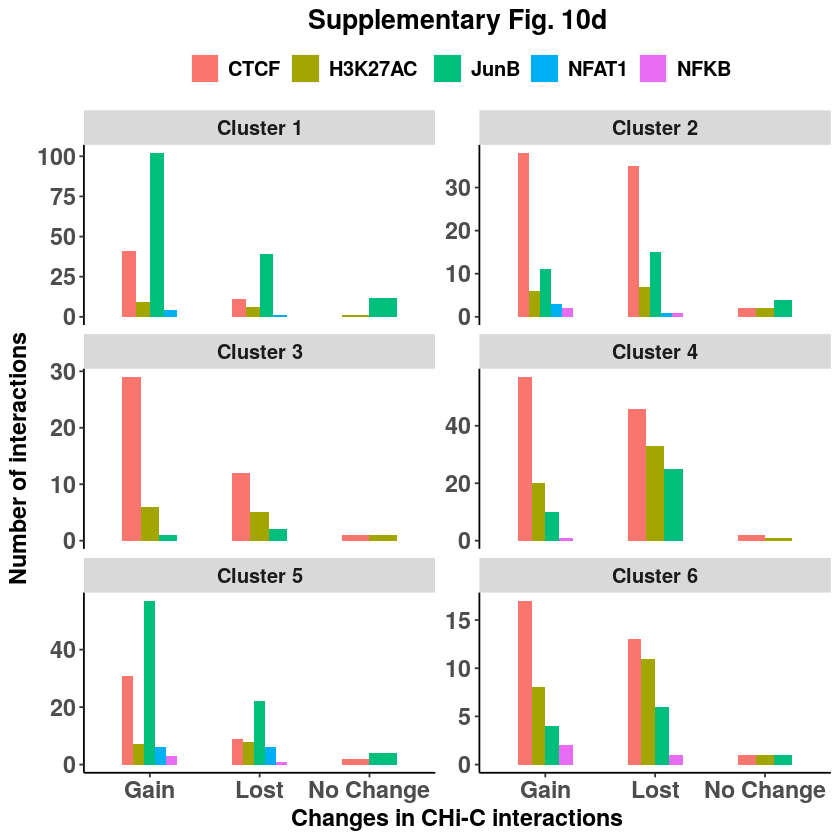

In [27]:

ggplot(subset(data_forplot, !(data_forplot$TF %in% 'Others')), aes(x=dynamic_symbol, fill=TF)) + 
geom_bar(width=0.5, position = "dodge") + xlab('Changes in CHi-C interactions') +
theme(panel.background=element_blank(), 
         axis.line=element_line(),
         axis.text=element_text(size=14, face='bold'),axis.title=element_text(size=14,face="bold"),
        strip.text = element_text(size=12, face='bold'),
        legend.text=element_text(size=12, face='bold'), plot.title=element_text(size=16, face="bold", hjust=0.5),
        legend.position='top', legend.title=element_blank()) + 
        ylab('Number of interactions') + ggtitle('Supplementary Fig. 10d') +
   facet_wrap(cluster~., ncol=2, scales="free_y")
